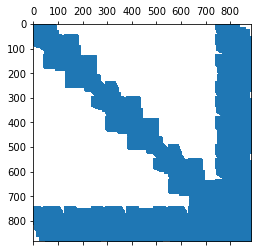

In [69]:
import numpy as np
import scipy
import matplotlib.pylab as plt
from matplotlib.pyplot import spy
from scipy import sparse
from scipy.io import mmread, mmwrite


m = mmread('matrix.mtx')

matrix = sparse.csr_matrix(m)

u_dof = np.genfromtxt('u_dof_ids.txt',dtype=np.int32)
p_dof = np.genfromtxt('p_dof_ids.txt',dtype=np.int32)
u_x = np.array([u_dof[i] for i in range(0,len(u_dof),3)])
u_y = np.array([u_dof[i] for i in range(1,len(u_dof),3)])
u_z = np.array([u_dof[i] for i in range(2,len(u_dof),3)])

sections = [len(u_x), len(u_y), len(u_z), len(p_dof)]
points = np.cumsum(sections)
points = np.insert(points, 0, 0)

u_x_i = range(0, points[1])
u_y_i = range(points[1], points[2])
u_z_i = range(points[2], points[3])
p_i = range(points[3], points[4])
all_i = np.concatenate([u_x_i, u_y_i, u_z_i, p_i])
all_j = np.concatenate([u_x, u_y, u_z, p_dof])
values = np.array([1 for i in range(matrix.shape[1])])

left_per = sparse.coo_matrix((values, (all_i, all_j))).tocsr()

right_per = left_per.transpose()

mtx = left_per@matrix@right_per

div = mtx - mtx.transpose()

mmwrite('matrix_ordered.mtx',mtx)

#plt.spy(mtx)

In [33]:
sections = [len(u_x), len(u_y), len(u_z), len(p_dof)]
points = np.cumsum(sections)
points = np.insert(points,0,0)
points
matrix.shape[1]

884

In [80]:
# вычисляем норму разности симметрии 
from scipy.sparse.linalg import norm
div = mtx - mtx.transpose()
norm(div)

1.2851966154889523e-11